# [Lab Session 3](fourier.ipynb)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import resize

**[Task 1 (a).]()** Load the first image, resize it to (256, 256) and display it.


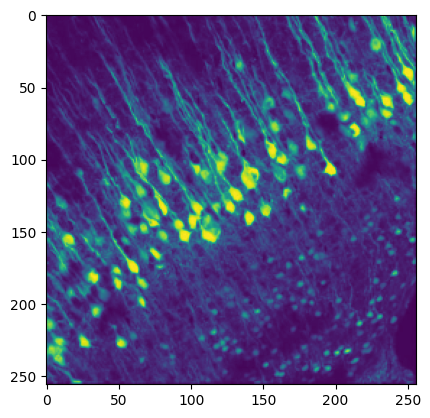

In [52]:
cell_img = plt.imread('data/cells.png')
cell_256 = resize(cell_img, (256, 256))
cell_256
plt.imshow(cell_256)

**[Task 1 (b).]()** Apply the fast Fourier transform and check the data type of the result.


In [53]:
cell_ft = np.fft.fft2(cell_256)
cell_ft.dtype

dtype('complex128')

**[Task 1 (c).]()** Extract the phase and amplitude and display them.


In [54]:
amplitude = np.abs(cell_ft)
phase = np.angle(cell_ft)
#print(amplitude)
#print(phase)

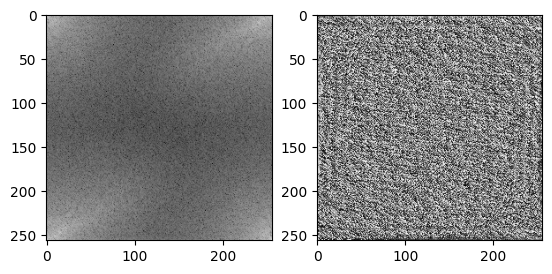

In [55]:
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase, 'gray')

**[Task 1 (d).]()** Do a shift so that zero is displayed in the center of the image and show amplitude and phase again.


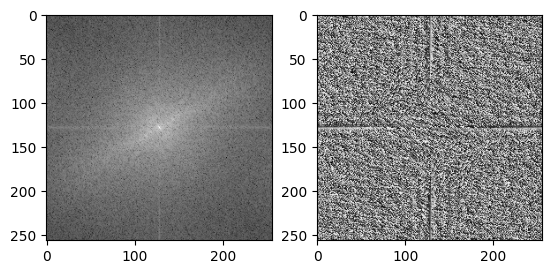

In [56]:
cell_ft2 = np.fft.fftshift(cell_ft)
amplitude2 = np.abs(cell_ft2)
phase2 = np.angle(cell_ft2)
plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude2), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase2, 'gray')

**[Task 1 (e).]()** Apply the inverse FFT and display the restored image.


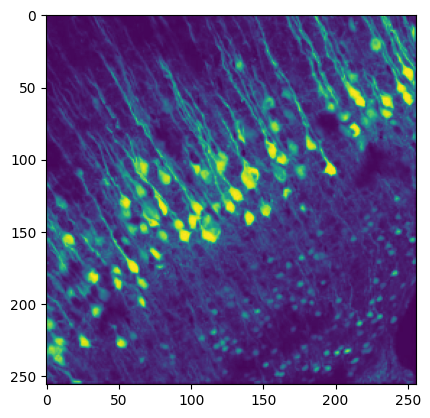

In [57]:
cell_is = np.fft.ifftshift(cell_ft2)
cell_i = np.fft.ifft2(cell_is)
plt.imshow(cell_i.real)

In [58]:
cell_img.real

array([[0.01568628, 0.01960784, 0.02352941, ..., 0.10980392, 0.09803922,
        0.01568628],
       [0.01568628, 0.01960784, 0.02745098, ..., 0.12156863, 0.09803922,
        0.00784314],
       [0.02352941, 0.02352941, 0.02745098, ..., 0.1254902 , 0.10196079,
        0.        ],
       ...,
       [0.08235294, 0.08235294, 0.08235294, ..., 0.08235294, 0.04313726,
        0.        ],
       [0.0627451 , 0.0627451 , 0.0627451 , ..., 0.09411765, 0.07058824,
        0.02352941],
       [0.01568628, 0.00784314, 0.00784314, ..., 0.01568628, 0.01960784,
        0.00784314]], dtype=float32)

---


**[Task 2 (a).]()** Load the brain CT image.


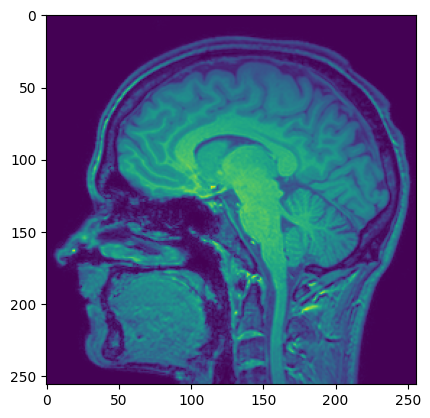

In [59]:
brain_img = plt.imread("data/brain_ct.png")
plt.imshow(brain_img)

**[Task 2 (b).]()** Apply the FFT, do a shift, extract amplitude and phase.


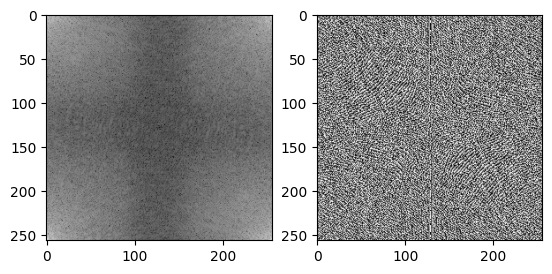

In [60]:
brain_fft = np.fft.fft2(brain_img)
brain_fs = np.fft.fftshift(brain_fft)


amplitude_brain = np.abs(brain_fft)
phase_brain = np.angle(brain_fs)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(np.log(amplitude_brain), 'gray')
plt.subplot(1, 2, 2)
plt.imshow(phase_brain, 'gray')

In [61]:
def to_complex_array(amplitude_array, phase_array):
    return amplitude_array * np.exp(1j * phase_array)

**[Task 2 (c).]()** Merge the amplitude of the brain CT and the phase of cell image. Do the IFFT and display the resulting image.


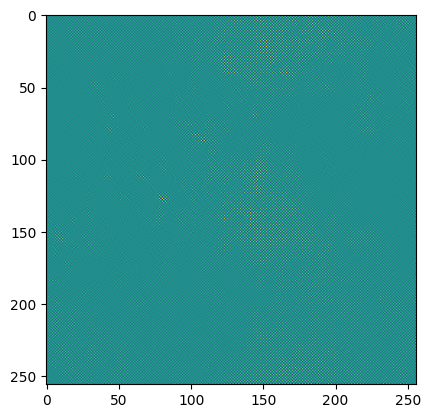

In [63]:
merg_shifted = to_complex_array(amplitude_brain, phase2)
brain_is = np.fft.ifftshift(merg_shifted)
brain_i = np.fft.ifft2(brain_is)
plt.imshow(brain_i.real)


**[Task 2 (d).]()** Repeat this with the amplitude of the cells and the phase of the brain.


---


**[Task 3 (a).]()** Create a lowpass filter mask.


In [ ]:
filter_window_size = 50

**[Task 3 (b).]()** Create a highpass filter maks.


**[Task 3 (c).]()** Apply the lowpass and highpass filter mask to the amplitude of the brain and display the results.


**[Task 3 (d).]()** Apply the mask to the amplitude, merge the result with the phase and restore the image.


---


**[Task 4 (a).]()** Implement a function that computes the 2D-DFT.


**[Task 4 (b).]()** Implement a function that computes the 2D-IDFT.


Due to high computational costs, we need to resize the image.


In [ ]:
test_img = resize(brain_img, (40, 40))
plt.imshow(test_img, 'gray')

**[Task 4 (c).]()** Apply your DFT implementation to the image and display amplitude and phase.


**[Task 4 (d).]()** Reconstruct the image using your IDFT implementation and display it.


**[Task 4 (e).]()** Compare your result to the result of numpy's FFT


**[Task 4 (f).]()** Round the arrays and compare them again.


**[Task 4 (g).]()** Compare the run times of the two algorithms (your DFT and numpy's FFT)
